# 1. Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score
import numpy as np
from sklearn import preprocessing
from xgboost import XGBClassifier
import catboost as ctb
from lightgbm import LGBMClassifier

%matplotlib inline

# 2. Импорт данных и предварительный анализ данных

In [1466]:
df = pd.read_csv("content/train.csv")

In [1467]:
df_test = pd.read_csv("content/test.csv")

In [1471]:
df.head()

id  area  nd_mean_2021-04-16  nd_mean_2021-04-19  nd_mean_2021-04-22  \
0  3536    20            0.072846            0.261778            0.062981   
1  3739    45            0.332928            0.287182            0.097138   
2  1294    28            0.013679            0.007055            0.120804   
3  2859    19            0.105976            0.052500            0.001917   
4  3685    33            0.130885            0.063492            0.024416   

   nd_mean_2021-04-26  nd_mean_2021-04-28  nd_mean_2021-05-02  \
0            0.104442            0.021096            0.052202   
1            0.152467            0.075484            0.000000   
2            0.037839            0.259125            0.000000   
3            0.011531            0.042316            0.000000   
4            0.000000            0.150671            0.046717   

   nd_mean_2021-05-04  nd_mean_2021-05-07  ...  nd_mean_2021-05-20  \
0            0.158723            0.000000  ...            0.108999   
1            0.140326            0.163340  ...            0.134469   
2            0.037446            0.506516  ...            0.084467   
3            0.000000            0.043604  ...            0.000000   
4            0.254284            0.101479  ...            0.206158   

   nd_mean_2021-06-04  nd_mean_2021-06-05  nd_mean_2021-06-10  \
0            0.118854            0.000000            0.000000   
1            0.208268            0.000000            0.000000   
2            0.000000            0.210496            0.130467   
3            0.642226            0.132886            0.000000   
4            0.099058            0.152003            0.073357   

   nd_mean_2021-07-05  nd_mean_2021-08-13  nd_mean_2021-08-27  \
0            0.026784            0.126832            0.614770   
1            0.111148            0.174914            0.179612   
2            0.155225            0.090607            0.054127   
3            0.570928            0.073492            0.378900   
4            0.147842            0.157676            0.012048   

   nd_mean_2021-05-08  nd_mean_2021-05-24  crop  
0            0.008857            0.081498     3  
1            0.113071            0.046997     4  
2            0.007437            0.219614     2  
3            0.327677            0.586523     5  
4            0.054223            0.017539     4  

[5 rows x 74 columns]

In [1498]:
df.describe()

id         area  nd_mean_2021-04-16  nd_mean_2021-04-19  \
count  4830.000000  4830.000000         4830.000000         4830.000000   
mean   3473.406211    53.871429            0.149911            0.118843   
std    1984.993812    34.191660            0.112598            0.103192   
min       0.000000    10.000000            0.000000            0.000000   
25%    1772.500000    26.000000            0.047477            0.025280   
50%    3489.500000    45.000000            0.142240            0.097346   
75%    5191.750000    76.000000            0.245596            0.202955   
max    6900.000000   140.000000            0.987671            0.760245   

       nd_mean_2021-04-22  nd_mean_2021-04-26  nd_mean_2021-04-28  \
count         4830.000000         4830.000000         4830.000000   
mean             0.158939            0.166146            0.125002   
std              0.136001            0.123605            0.117605   
min              0.000000            0.000000            0.000000   
25%              0.050124            0.053859            0.027609   
50%              0.129819            0.155571            0.096516   
75%              0.241323            0.269131            0.192070   
max              0.764437            0.983779            0.668150   

       nd_mean_2021-05-02  nd_mean_2021-05-04  nd_mean_2021-05-07  ...  \
count         4830.000000         4830.000000         4830.000000  ...   
mean             0.162440            0.092302            0.108834  ...   
std              0.145027            0.095207            0.120939  ...   
min              0.000000            0.000000            0.000000  ...   
25%              0.040885            0.012844            0.014682  ...   
50%              0.121307            0.069936            0.077155  ...   
75%              0.277772            0.143207            0.162079  ...   
max              0.970286            0.779277            0.782066  ...   

       nd_mean_2021-06-05  nd_mean_2021-06-10  nd_mean_2021-07-05  \
count         4830.000000         4830.000000         4830.000000   
mean             0.111583            0.141471            0.172343   
std              0.150879            0.190674            0.228629   
min              0.000000            0.000000            0.000000   
25%              0.012363            0.017028            0.018379   
50%              0.068423            0.077626            0.085643   
75%              0.149199            0.168154            0.192834   
max              0.867968            0.946030            0.939444   

       nd_mean_2021-08-13  nd_mean_2021-08-27  nd_mean_2021-05-08  \
count         4830.000000         4830.000000         4830.000000   
mean             0.121483            0.145211            0.107207   
std              0.151392            0.162711            0.108508   
min              0.000000            0.000000            0.000000   
25%              0.015292            0.022416            0.017028   
50%              0.076428            0.088429            0.079537   
75%              0.162134            0.198258            0.162584   
max              0.896011            0.786905            0.766119   

       nd_mean_2021-05-24         crop          sum         mean  
count         4830.000000  4830.000000  4830.000000  4830.000000  
mean             0.119274     2.953830    18.619012     0.519176  
std              0.155346     2.004587     2.341338     0.066245  
min              0.000000     0.000000    11.266026     0.313536  
25%              0.011673     1.000000    16.960652     0.472285  
50%              0.070808     3.000000    18.551862     0.516136  
75%              0.158424     5.000000    20.193971     0.562878  
max              0.835383     6.000000    28.738846     0.820415  

[8 rows x 75 columns]

In [1499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4830 non-null   int64  
 1   area                4830 non-null   int64  
 2   nd_mean_2021-04-16  4830 non-null   float64
 3   nd_mean_2021-04-19  4830 non-null   float64
 4   nd_mean_2021-04-22  4830 non-null   float64
 5   nd_mean_2021-04-26  4830 non-null   float64
 6   nd_mean_2021-04-28  4830 non-null   float64
 7   nd_mean_2021-05-02  4830 non-null   float64
 8   nd_mean_2021-05-04  4830 non-null   float64
 9   nd_mean_2021-05-07  4830 non-null   float64
 10  nd_mean_2021-05-16  4830 non-null   float64
 11  nd_mean_2021-05-17  4830 non-null   float64
 12  nd_mean_2021-05-21  4830 non-null   float64
 13  nd_mean_2021-05-26  4830 non-null   float64
 14  nd_mean_2021-05-27  4830 non-null   float64
 15  nd_mean_2021-05-29  4830 non-null   float64
 16  nd_mea

Данные представляют временной ряд с доп. столбцами area, id, geo и crop - столбец меток.
Пропусков нет, но есть нулевые значения, а также можно видеть большой разброс между 50 процентилем и макс значением столбцов

# 3. EDA

Попробуем поработать с данными временного ряда и дополнить features, дополнив решение baseline

In [1474]:
df['sum'] = df.iloc[:,2:39].sum(axis=1)
df['mean'] = df.iloc[:,2:39].mean(axis=1)

In [1475]:
df['sum'] = df['sum'] + df.iloc[:,40:73].sum(axis=1)
df['mean'] = df['mean'] + df.iloc[:,40:73].mean(axis=1)

<AxesSubplot:ylabel='sum'>

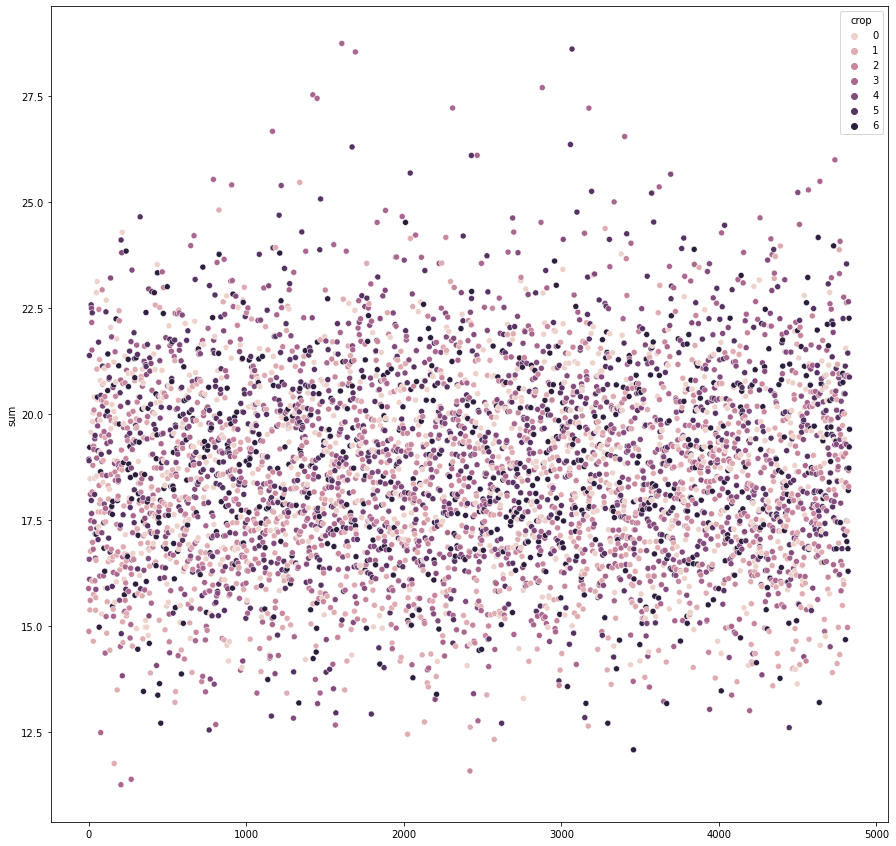

In [62]:
sns.scatterplot(data=df[['sum', 'crop']], x=df.index, y="sum", hue='crop')

Тенденция в колонках sum и mean не прослеживается   
Построим первые 10 наблюдений

In [143]:
df_lineplot = df.iloc[:10]
df_lineplot = df_lineplot.select_dtypes(include=['float64'])
df_lineplot = df_lineplot.drop(columns=['sum', 'mean'], axis=1)
df_lineplot

nd_mean_2021-04-16  nd_mean_2021-04-19  nd_mean_2021-04-22  \
0            0.072846            0.261778            0.062981   
1            0.332928            0.287182            0.097138   
2            0.013679            0.007055            0.120804   
3            0.105976            0.052500            0.001917   
4            0.130885            0.063492            0.024416   
5            0.280111            0.255778            0.174677   
6            0.065092            0.095285            0.317724   
7            0.019472            0.250000            0.000000   
8            0.140723            0.151389            0.084425   
9            0.259478            0.275341            0.206800   

   nd_mean_2021-04-26  nd_mean_2021-04-28  nd_mean_2021-05-02  \
0            0.104442            0.021096            0.052202   
1            0.152467            0.075484            0.000000   
2            0.037839            0.259125            0.000000   
3            0.011531            0.042316            0.000000   
4            0.000000            0.150671            0.046717   
5            0.327109            0.052556            0.093938   
6            0.092715            0.210422            0.000000   
7            0.254601            0.000000            0.300878   
8            0.200453            0.031948            0.066672   
9            0.113008            0.101093            0.280849   

   nd_mean_2021-05-04  nd_mean_2021-05-07  nd_mean_2021-05-16  \
0            0.158723            0.000000            0.484102   
1            0.140326            0.163340            0.519456   
2            0.037446            0.506516            0.000000   
3            0.000000            0.043604            0.510271   
4            0.254284            0.101479            0.000000   
5            0.000000            0.084180            0.438128   
6            0.103085            0.049388            0.566210   
7            0.153703            0.122723            0.352370   
8            0.091610            0.000000            0.321452   
9            0.040560            0.043373            0.231380   

   nd_mean_2021-05-17  ...  nd_mean_2021-05-19  nd_mean_2021-05-20  \
0            0.201013  ...            0.425571            0.108999   
1            0.501486  ...            0.248935            0.134469   
2            0.561541  ...            0.127633            0.084467   
3            0.511552  ...            0.527583            0.000000   
4            0.403379  ...            0.000000            0.206158   
5            0.506480  ...            0.596844            0.550864   
6            0.000000  ...            0.161205            0.108805   
7            0.288834  ...            0.233836            0.019850   
8            0.336913  ...            0.052141            0.000000   
9            0.095585  ...            0.052068            0.000000   

   nd_mean_2021-06-04  nd_mean_2021-06-05  nd_mean_2021-06-10  \
0            0.118854            0.000000            0.000000   
1            0.208268            0.000000            0.000000   
2            0.000000            0.210496            0.130467   
3            0.642226            0.132886            0.000000   
4            0.099058            0.152003            0.073357   
5            0.597998            0.039885            0.773661   
6            0.079312            0.032510            0.000000   
7            0.208412            0.230455            0.000000   
8            0.160664            0.082408            0.004456   
9            0.008591            0.095069            0.251147   

   nd_mean_2021-07-05  nd_mean_2021-08-13  nd_mean_2021-08-27  \
0            0.026784            0.126832            0.614770   
1            0.111148            0.174914            0.179612   
2            0.155225            0.090607            0.054127   
3            0.570928            0.073492            0.378900   
4            0.147842            0.157676  

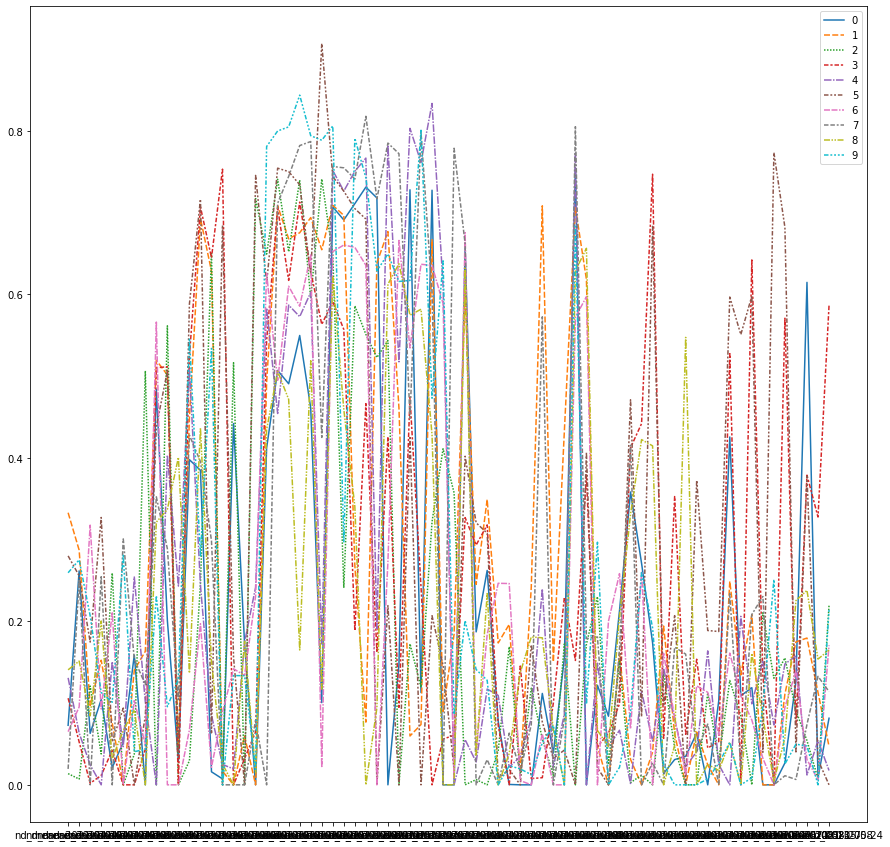

In [147]:
sns.lineplot(data=df_lineplot.T)
plt.show()

На графике видны выбросы в виде острых впадин и вершин, попробуем избавиться от них. 
Отсортируем датафрейм, а также продублируем датафрейм где 0 заменим Nan

In [709]:
df1 = df.replace(0.000000, np.nan)
df1 = df1.reindex(sorted(df1.columns), axis=1)
df1 = df1.drop(['.geo', 'area', 'crop', 'id', 'mean', 'sum'], axis = 1)
df_sorted = df1.fillna(0.000000)

## 3.1 Поиск и заполнение выбросов

Построим boxplot диаграммы для временного ряда.

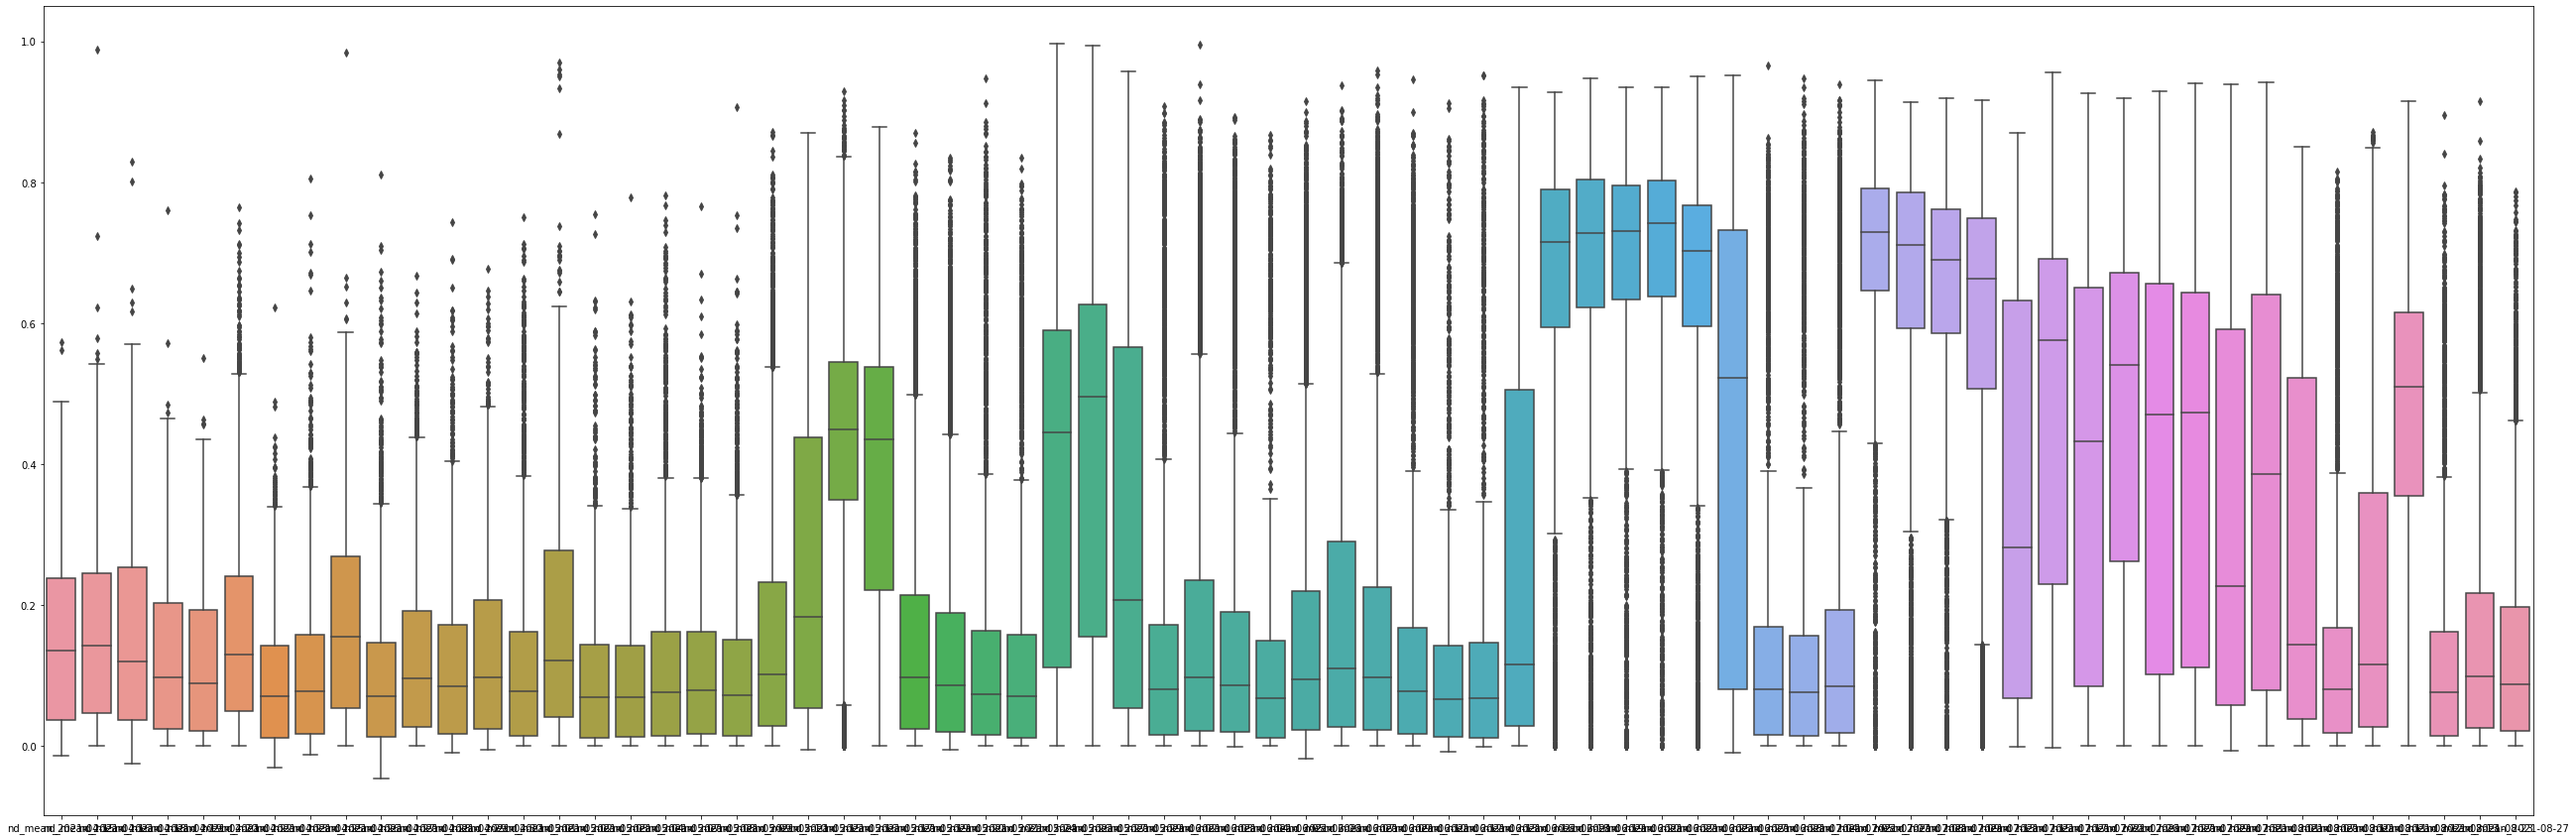

In [1121]:
#raw data
plt.figure(figsize=(45,15))
sns.boxplot(data=df_sorted, orient="v")
plt.show()

Видно много выбросов, "прибьем" их к верхней и нижней границам boxplot

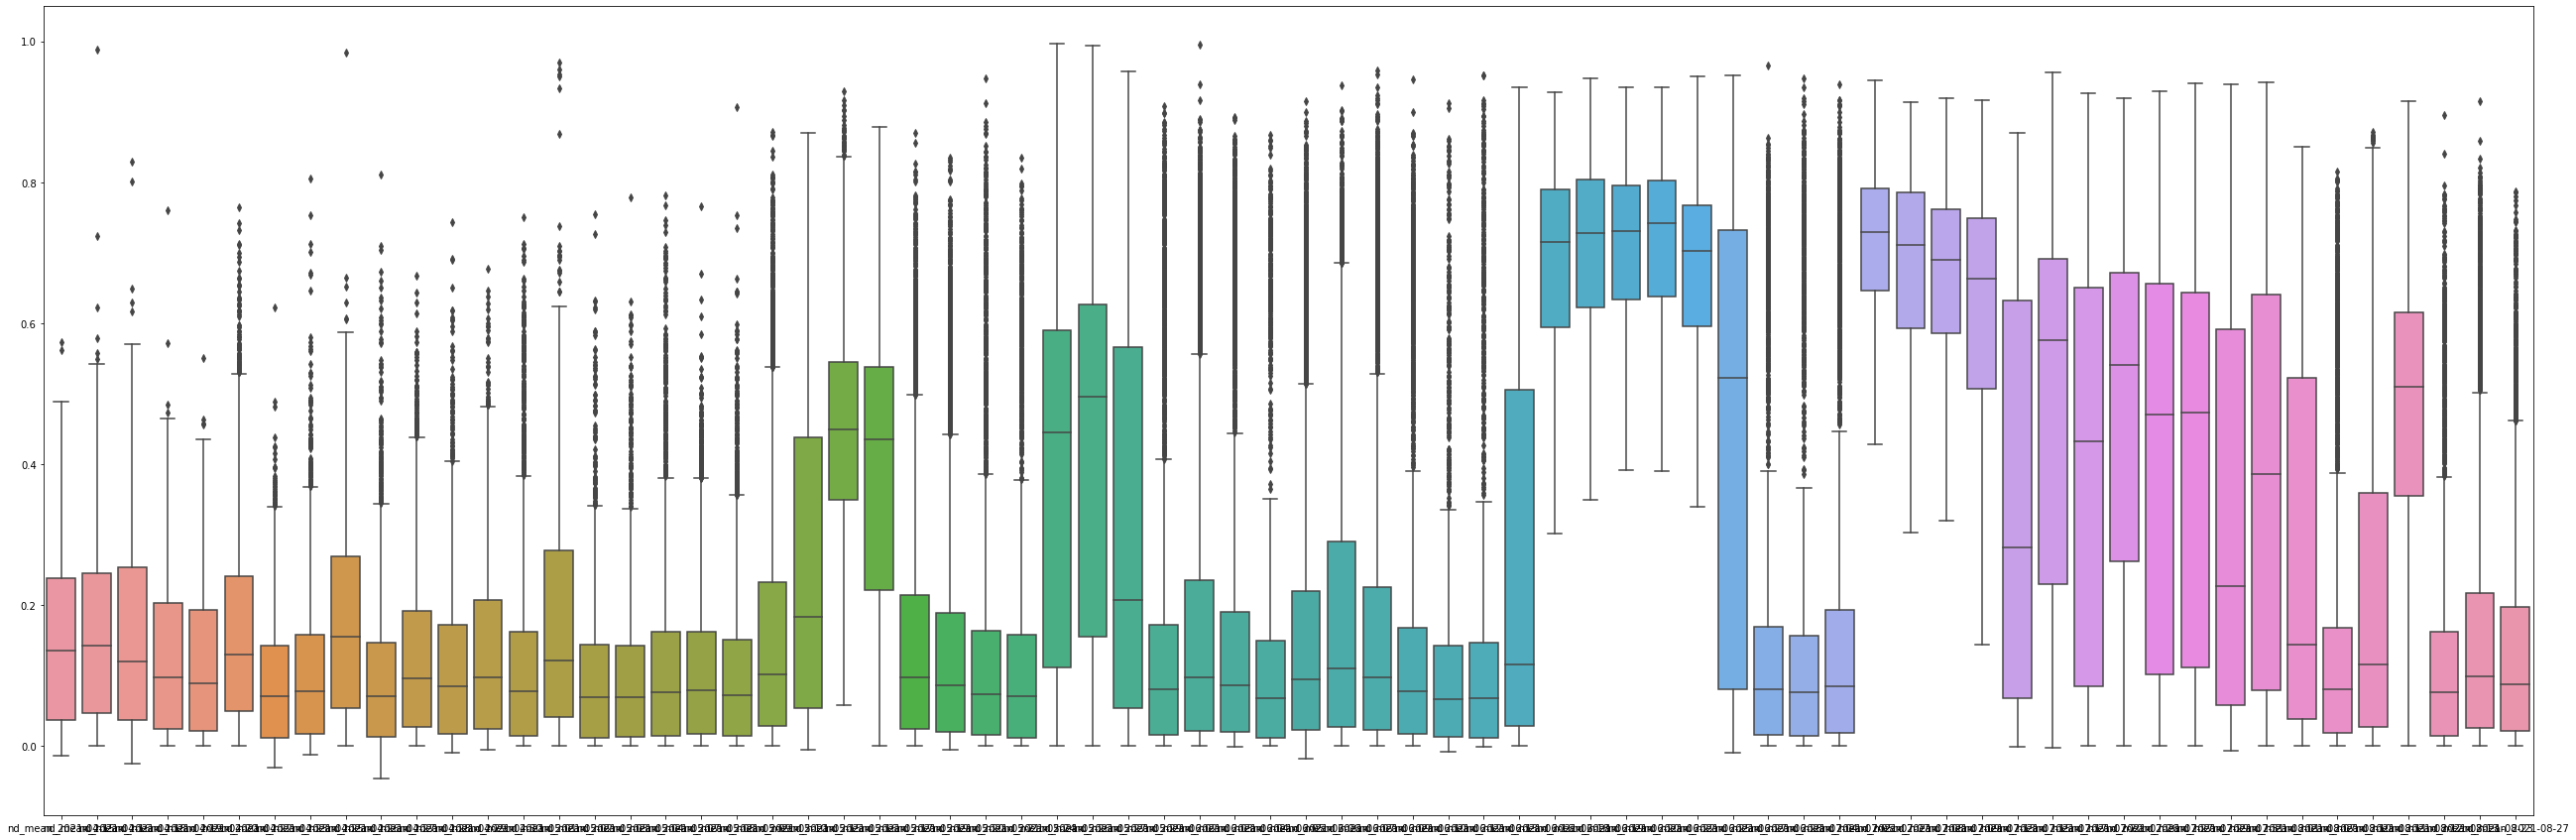

In [1265]:
# down outlier clear
iqr=df_sorted.quantile(0.75) - df_sorted.quantile(0.25)

df_sorted_down = df_sorted.mask((df_sorted < (df_sorted.quantile(0.25)- 1.5*iqr)), (df_sorted.quantile(0.25)- 1.5*iqr), axis=1)
plt.figure(figsize=(45,15))
sns.boxplot(data=df_sorted_down, orient="v")
plt.show()

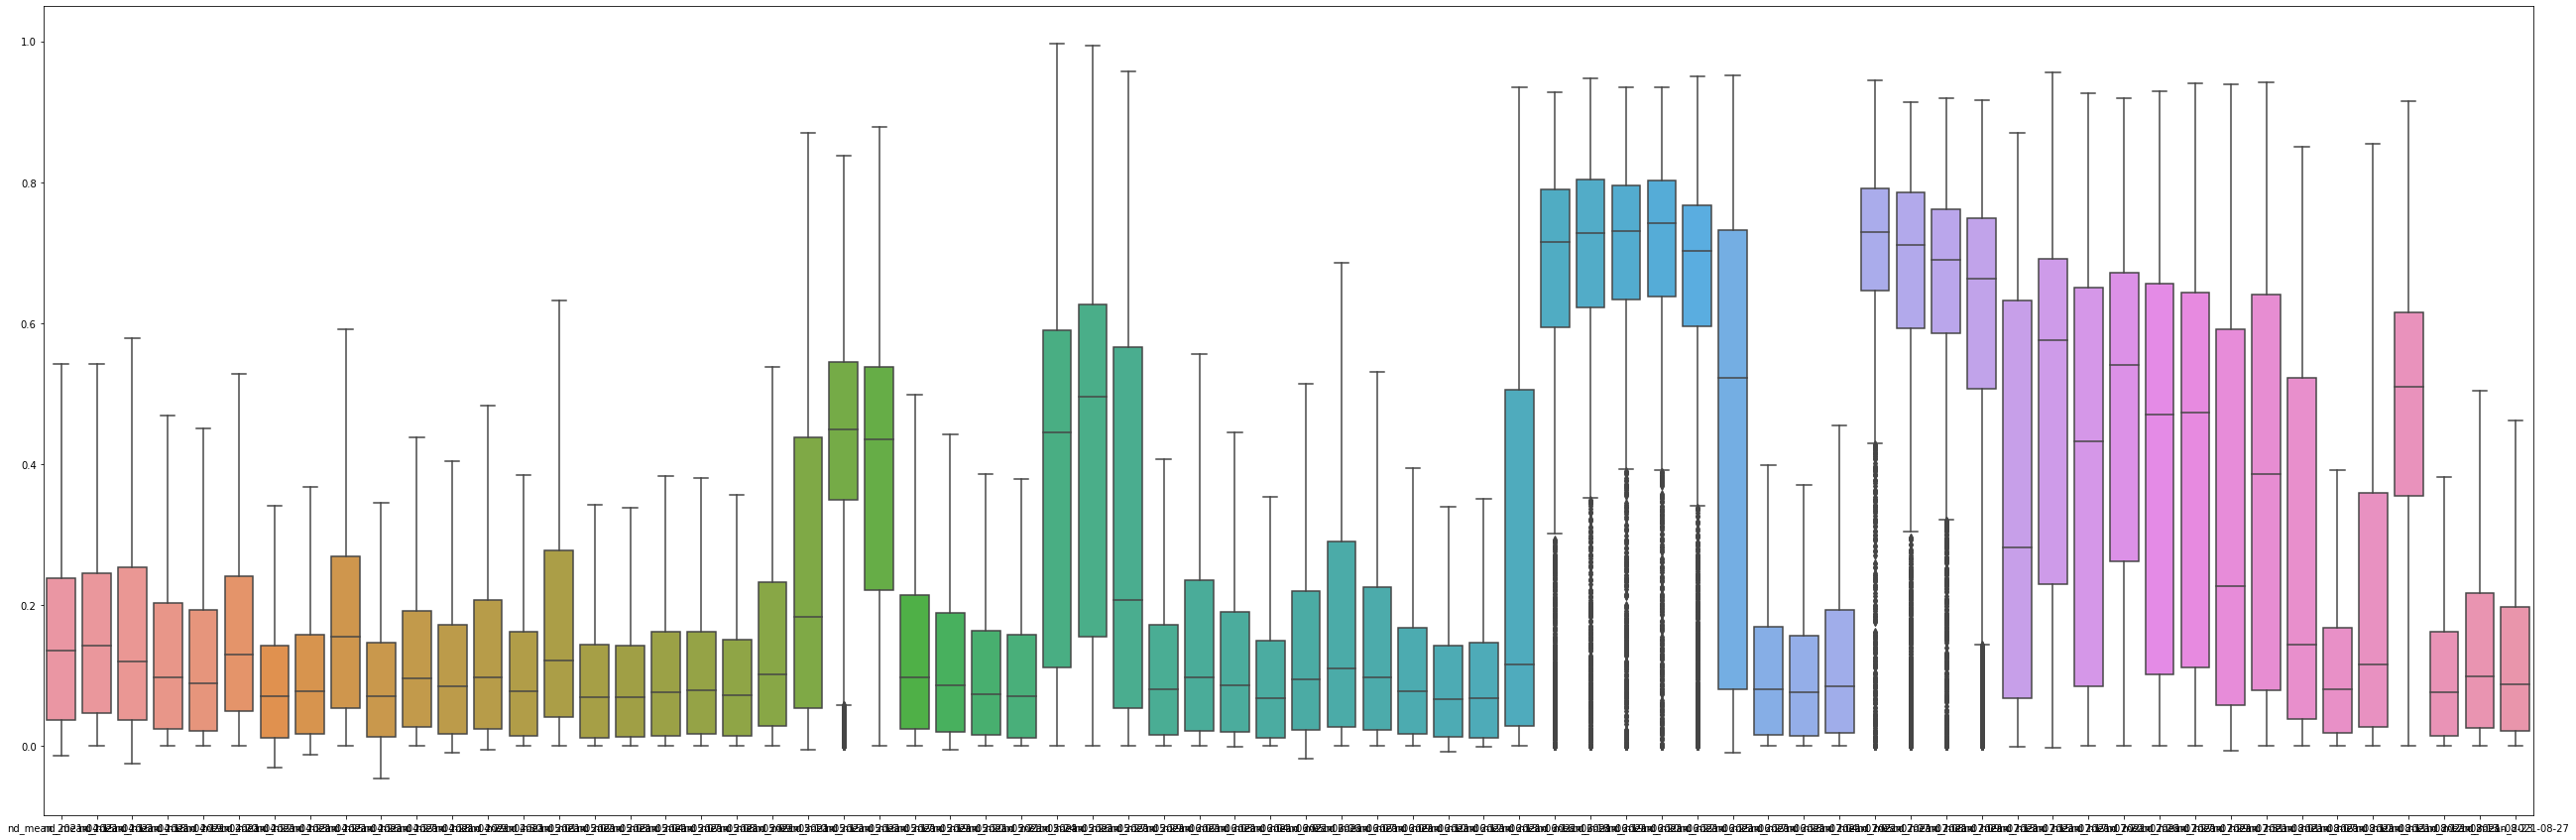

In [1266]:
# up outliers clear
df_sorted_up = df_sorted.mask((df_sorted > (df_sorted.quantile(0.75)+ 1.5*iqr)), (df_sorted.quantile(0.75)+ 1.5*iqr), axis=1)
plt.figure(figsize=(45,15))
sns.boxplot(data=df_sorted_up, orient="v")
plt.show()

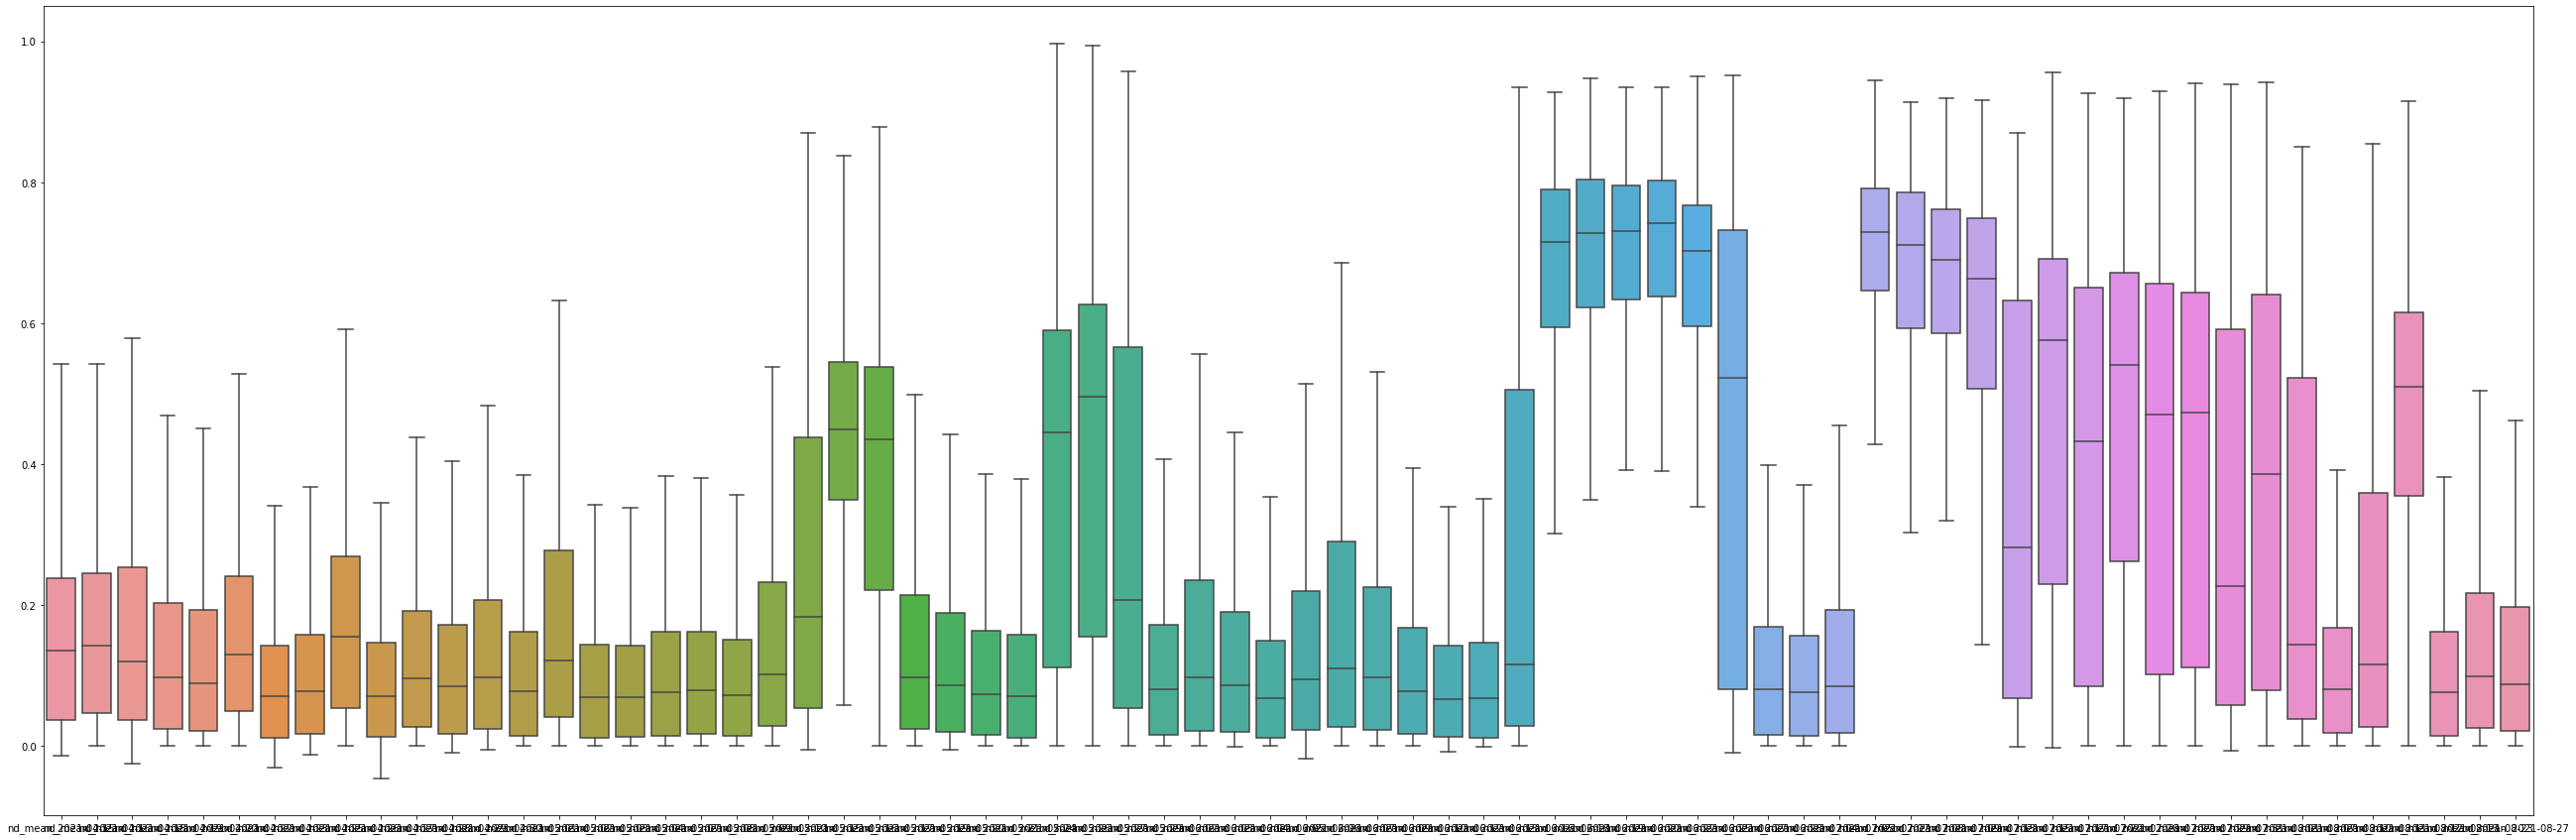

In [1267]:
# up-down outliers clear
df_sorted_up_down = df_sorted_down.mask((df_sorted_down > (df_sorted_down.quantile(0.75)+ 1.5*iqr)), (df_sorted_down.quantile(0.75)+ 1.5*iqr), axis=1)
plt.figure(figsize=(45,15))
sns.boxplot(data=df_sorted_up_down, orient="v")
plt.show()

## 3.2 Заполнение нулевых значений

Здесь мы заполним полученные Nan значениями скользящего окна либо интерполяцией

In [685]:
#заполнение нулевых значений скользящим окном
filled_df1 = df1.fillna(df1.rolling(5, min_periods=2, axis=1).mean())
filled_df1 = filled_df1.fillna(filled_df1.rolling(5, min_periods=2, axis=1).mean())
filled_df1 = filled_df1.fillna(filled_df1.rolling(5, min_periods=2, axis=1).mean())
filled_df1 = filled_df1.fillna(filled_df1.interpolate(asix=1))

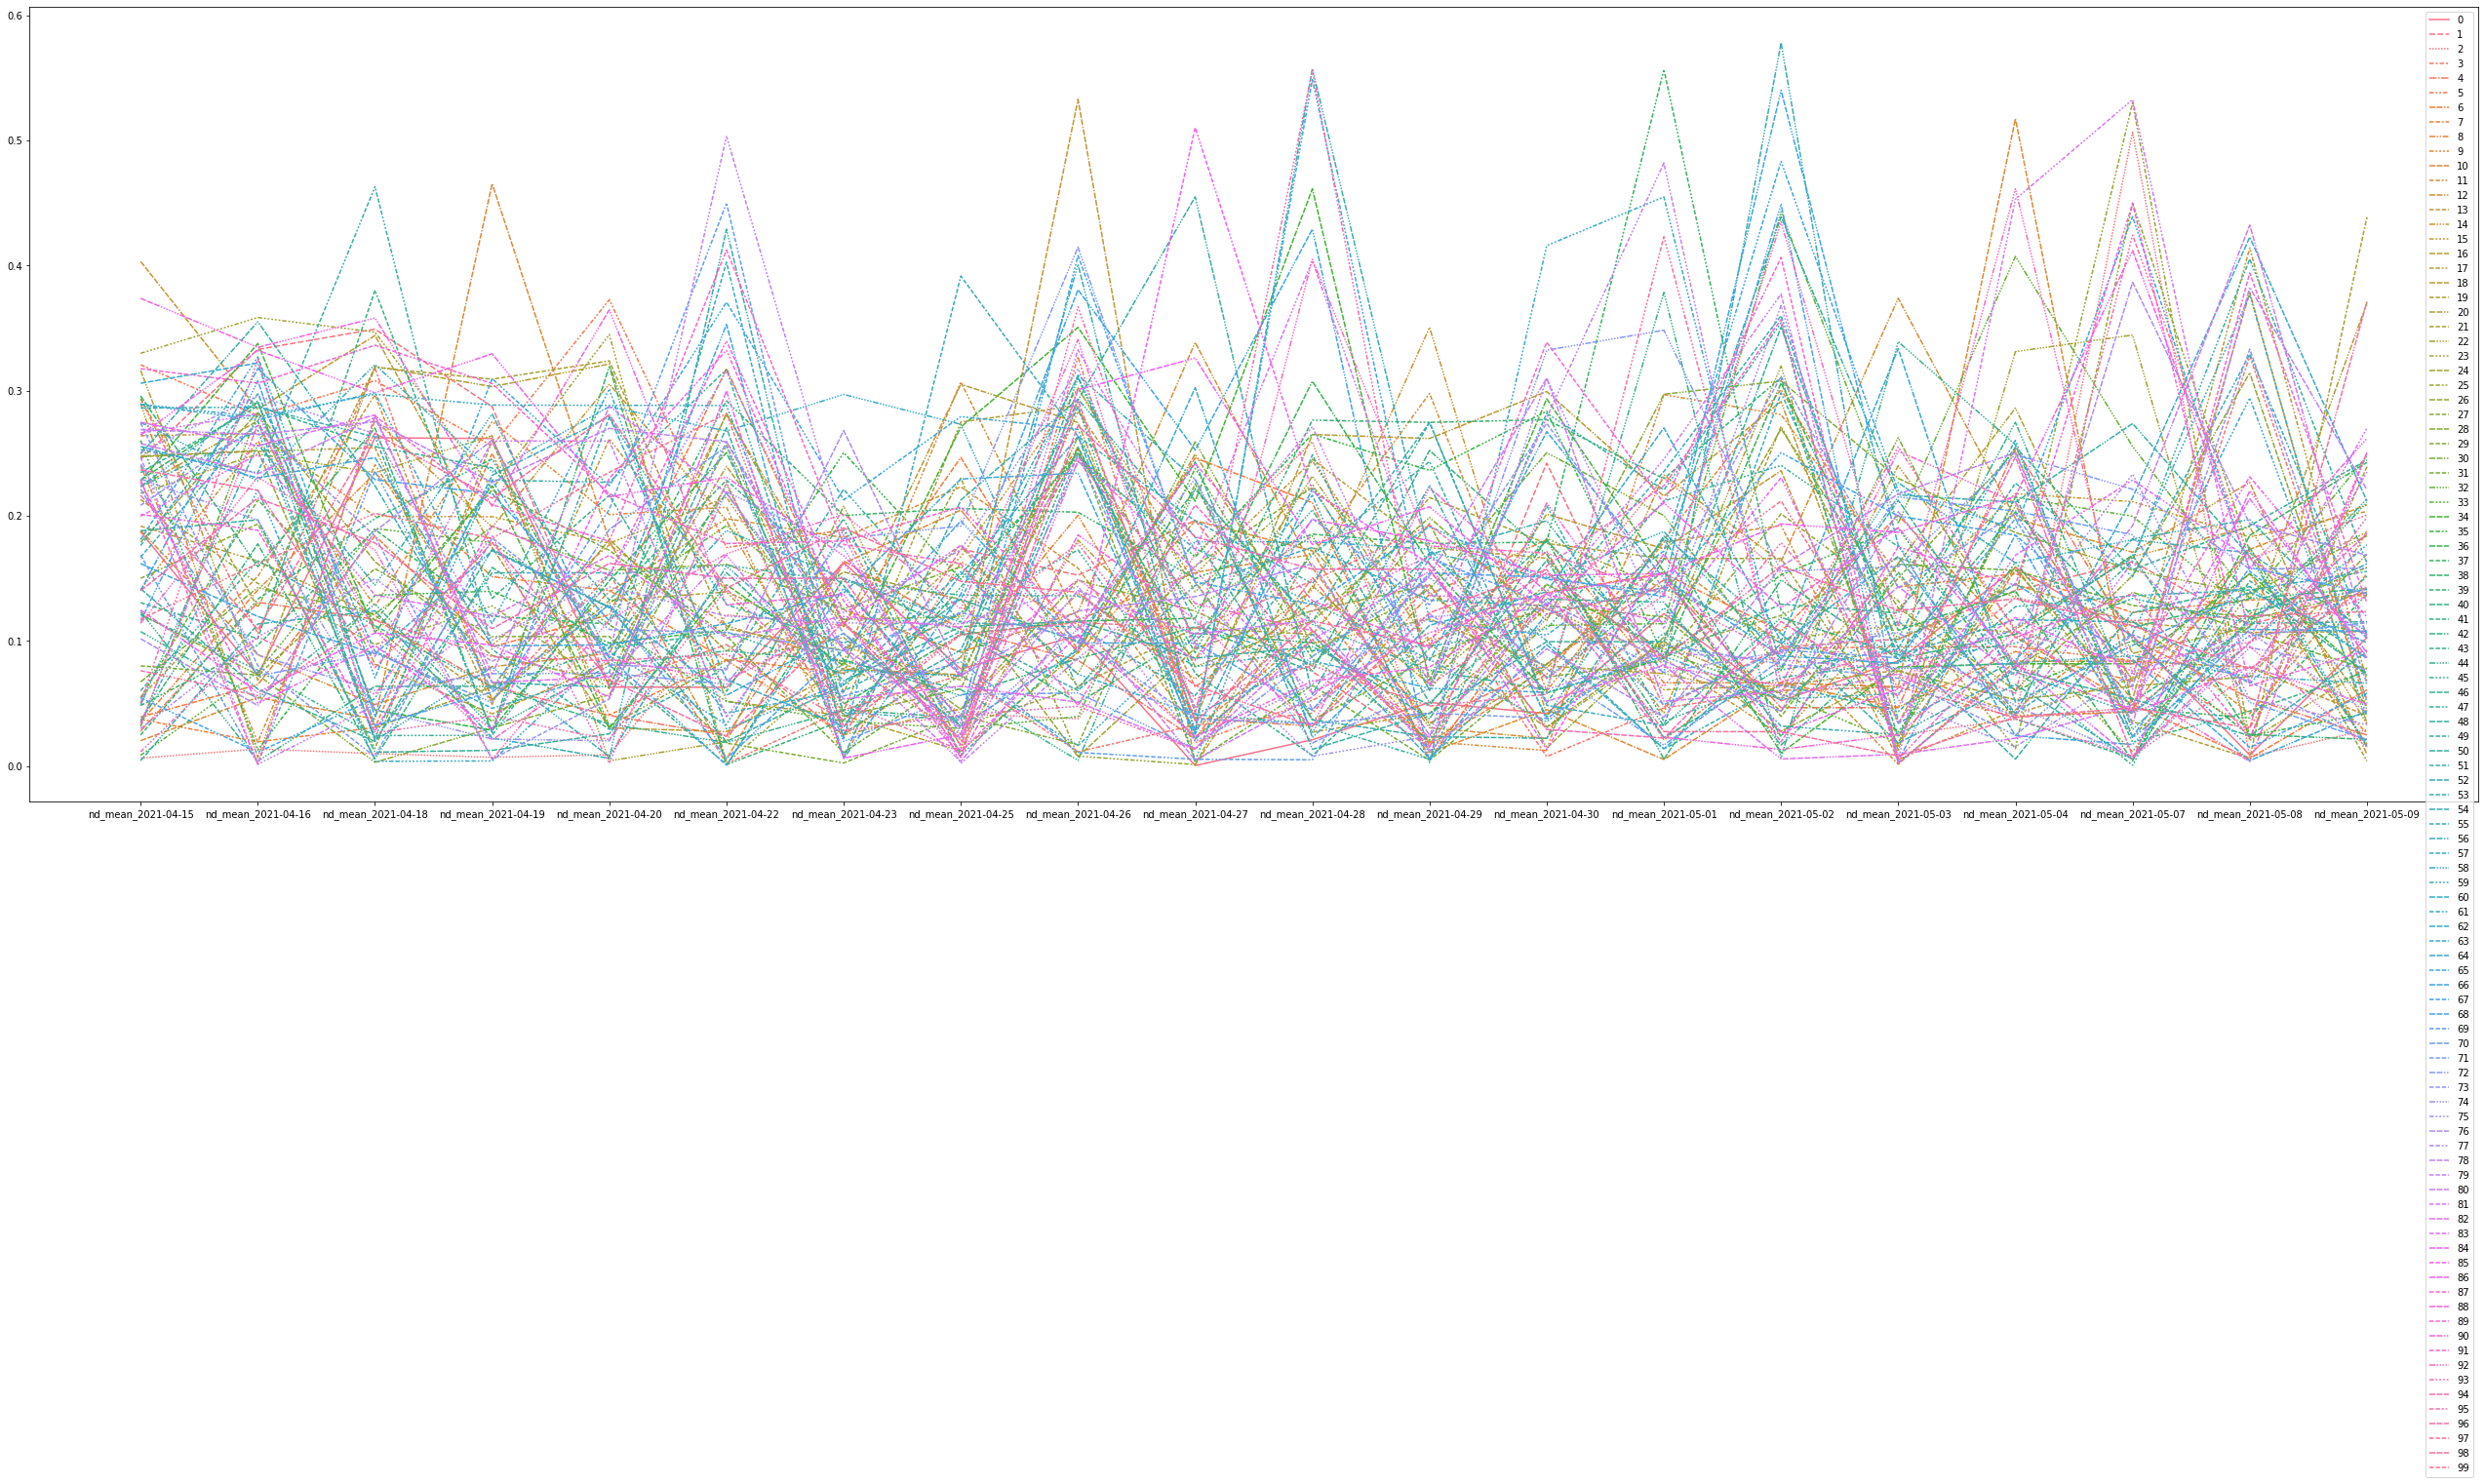

In [1105]:
filled_df1_lineplot = filled_df1.iloc[:100]
plt.figure(figsize=(45,15))
sns.lineplot(data=filled_df1_lineplot.iloc[:,:20].T)
plt.show()

In [686]:
#заполнение нулевых значений интерполяцией
filled_df2 = df1.fillna(filled_df1.interpolate(asix=1))

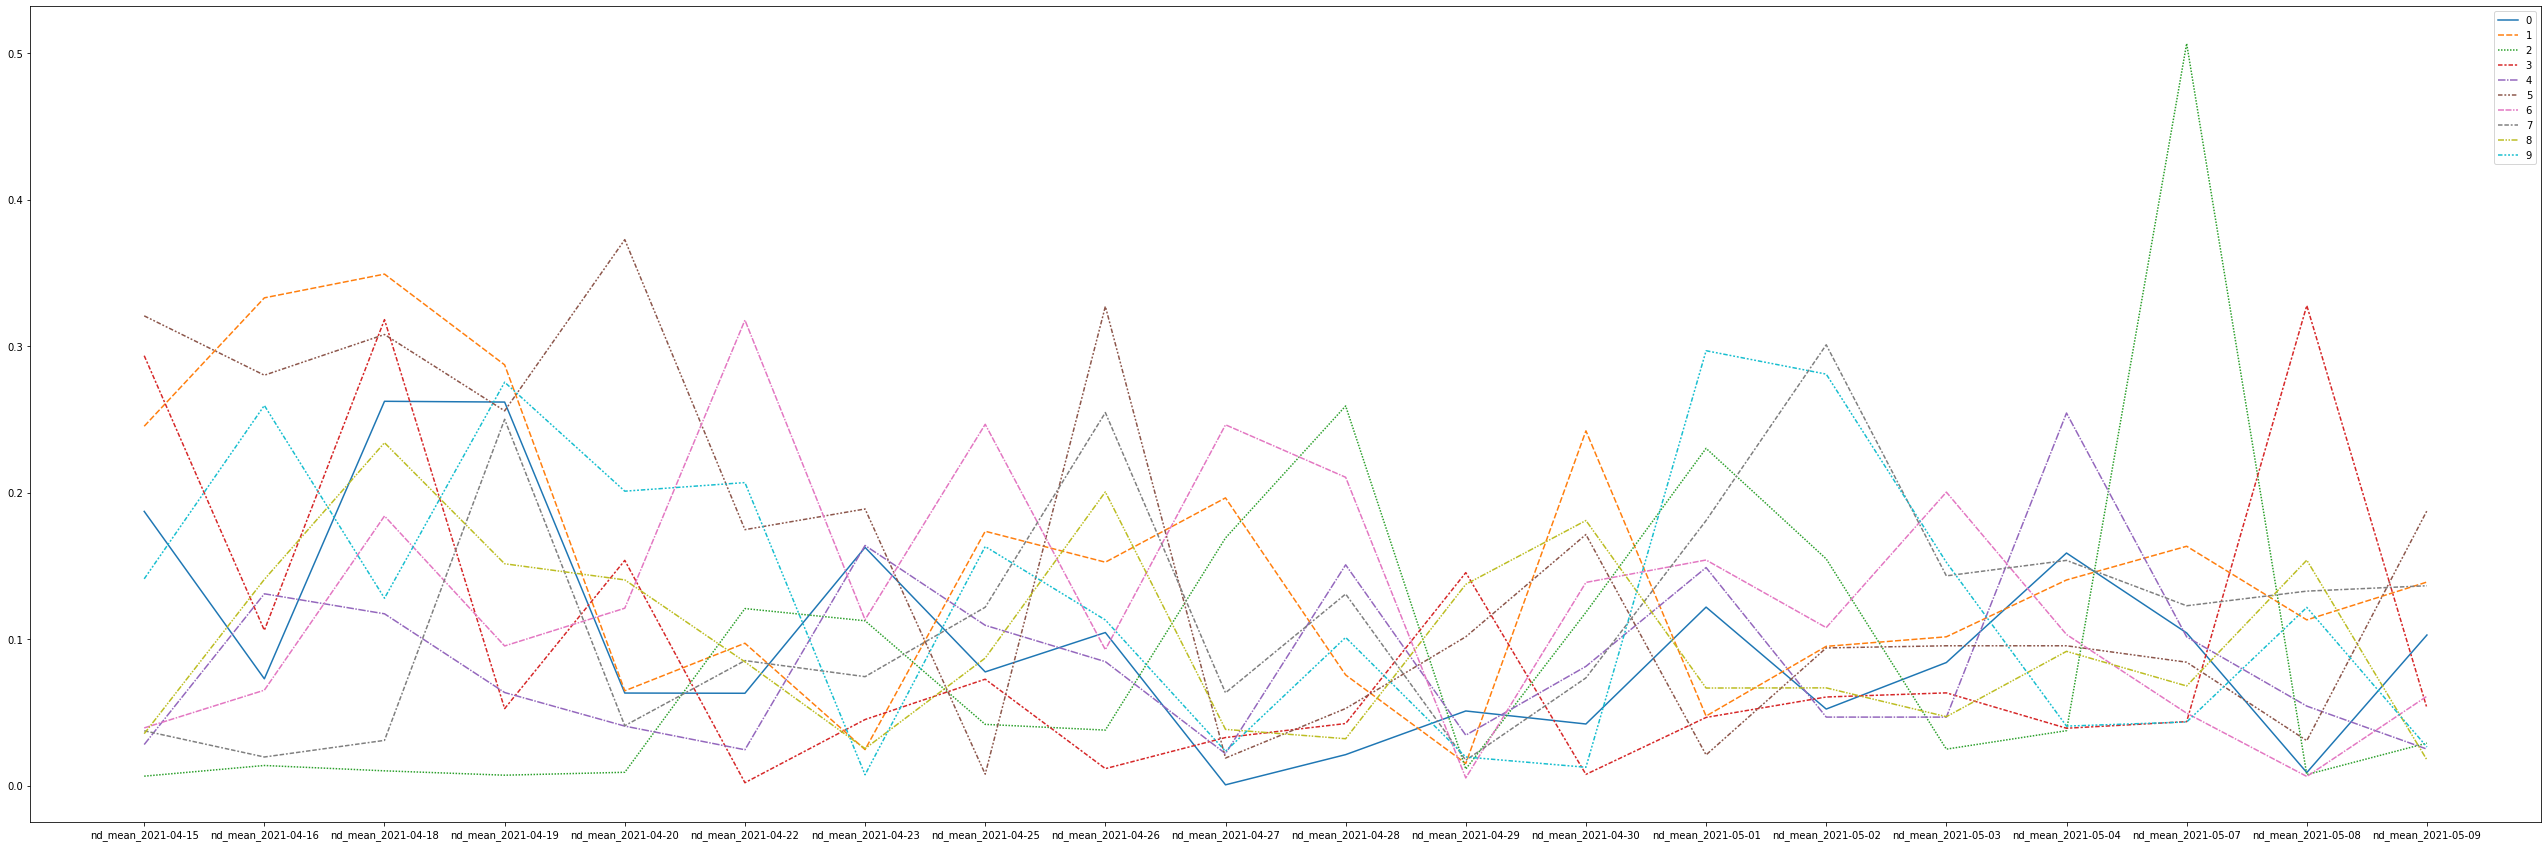

In [766]:
filled_df2_lineplot = filled_df2.iloc[:10]
plt.figure(figsize=(45,15))
sns.lineplot(data=filled_df2_lineplot.iloc[:,:20].T)
plt.show()

## 3.3 Среднее и сумма по месяцам

In [1502]:
new_cols = []
for col in df_sorted.columns.tolist():
    new_cols.append(col.replace('nd_mean_', ''))
df_mean.columns = pd.to_datetime(new_cols)

In [1503]:
df_sum_month = df_mean.groupby([(df_mean.columns.month)], axis=1).sum()
df_sum_month

4          5         6         7         8
0     2.231529   6.865028  3.936439  1.880502  0.977595
1     3.458807   8.125563  5.561536  0.961519  0.834010
2     1.819447   9.095662  2.371441  0.725359  0.867974
3     2.511524   7.751838  2.913337  3.014352  2.712633
4     2.171656   8.005184  4.727327  0.963975  0.713747
...        ...        ...       ...       ...       ...
4825  2.612725   9.076797  5.346238  1.215369  0.478231
4826  2.953898  11.016111  6.097356  1.430755  0.764216
4827  2.470170  10.040597  4.570591  1.486763  0.661529
4828  3.855759   8.452729  3.105953  2.913815  2.547528
4829  2.756914  10.591077  5.048321  0.900205  0.349276

[4830 rows x 5 columns]

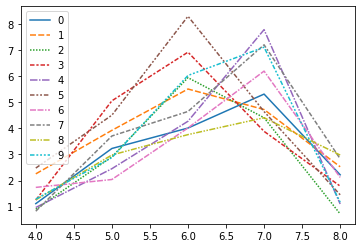

In [171]:
sns.lineplot(data=df_sum_month.head(10).T)
plt.show()

In [219]:
df_mean_month = df_mean.groupby([(df_mean.columns.month)], axis=1).mean()
df_mean_month

4         5         6         7         8
0     0.085675  0.179394  0.222934  0.408862  0.277527
1     0.173534  0.218047  0.306101  0.363316  0.315966
2     0.069050  0.161580  0.330289  0.339162  0.089935
3     0.096154  0.281011  0.384638  0.298926  0.223245
4     0.074308  0.136346  0.237425  0.599021  0.137594
...        ...       ...       ...       ...       ...
4825  0.114660  0.168496  0.237053  0.593744  0.277527
4826  0.091001  0.211431  0.338878  0.671304  0.305852
4827  0.106758  0.155490  0.300406  0.546885  0.315771
4828  0.140203  0.291253  0.432957  0.336086  0.206030
4829  0.140475  0.152133  0.294119  0.616032  0.222333

[4830 rows x 5 columns]

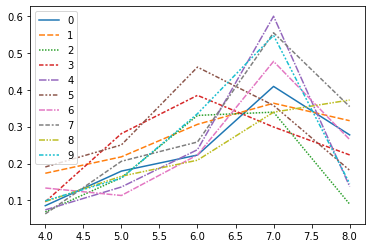

In [220]:
sns.lineplot(data=df_mean_month.head(10).T)
plt.show()

# 4. Построение и обучение модели

Построим и запустим модели на "сырых" данных и подсчитаем метрику Recall

In [1460]:
X = df.drop(["id",".geo", "crop", 'sum', 'mean'], axis = 1)

In [1461]:
y = df['crop'].to_numpy()

In [1476]:
# Данные для расчета тестовой выборки
# X_train = df.drop(["id",".geo", "crop", 'sum', 'mean'], axis = 1)
# y_train = df['crop']
# X_test = df_test.drop(["id",".geo"], axis = 1)

In [1463]:
#preprocessing
transform = preprocessing.StandardScaler()
X_st = transform.fit_transform(X)

In [1464]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LGBM

In [1465]:
for i in range (300, 301):
    lgbm_mod = LGBMClassifier(random_state=0, n_estimators = i) 
    lgbm_mod.fit(X_train, y_train)

    pred = lgbm_mod.predict(X_test)
    recall = recall_score(y_test, pred, average="macro", zero_division=0)
    print('i: ', i,  'recall: ', recall, )

i:  1 recall:  0.8848577337644112
i:  2 recall:  0.9031113426306494
i:  3 recall:  0.9188365481089809
i:  4 recall:  0.9249431636890735
i:  5 recall:  0.9276608342894469
i:  6 recall:  0.9337879900964253
i:  7 recall:  0.9363964970645581
i:  8 recall:  0.9405168584601994
i:  9 recall:  0.9459969905244983
i:  10 recall:  0.9453752642080049
i:  11 recall:  0.9431687823980391
i:  12 recall:  0.9466227732258764
i:  13 recall:  0.9501139835872084
i:  14 recall:  0.9481195804258554
i:  15 recall:  0.9466679075017661
i:  16 recall:  0.9459135770994989
i:  17 recall:  0.9465906251699119
i:  18 recall:  0.9487460278617703
i:  19 recall:  0.9473274238809843
i:  20 recall:  0.9480044719513974
i:  21 recall:  0.9480044719513974
i:  22 recall:  0.9487556087306912
i:  23 recall:  0.9444981667416866
i:  24 recall:  0.9466711011247398
i:  25 recall:  0.9480785606602782
i:  26 recall:  0.9487082017191666
i:  27 recall:  0.9479602585628466
i:  28 recall:  0.9501331929458997
i:  29 recall:  0.94941193148

i:  232 recall:  0.9570811453543129
i:  233 recall:  0.9570811453543129
i:  234 recall:  0.9570811453543129
i:  235 recall:  0.9570811453543129
i:  236 recall:  0.9570811453543129
i:  237 recall:  0.9570811453543129
i:  238 recall:  0.9570811453543129
i:  239 recall:  0.9570811453543129
i:  240 recall:  0.9570811453543129
i:  241 recall:  0.9570811453543129
i:  242 recall:  0.9570811453543129
i:  243 recall:  0.9570811453543129
i:  244 recall:  0.9570811453543129
i:  245 recall:  0.9570811453543129
i:  246 recall:  0.9570811453543129
i:  247 recall:  0.9570811453543129
i:  248 recall:  0.9570811453543129
i:  249 recall:  0.9570811453543129
i:  250 recall:  0.9570811453543129
i:  251 recall:  0.9570811453543129
i:  252 recall:  0.9570811453543129
i:  253 recall:  0.9570811453543129
i:  254 recall:  0.9570811453543129
i:  255 recall:  0.9570811453543129
i:  256 recall:  0.9570811453543129
i:  257 recall:  0.9570811453543129
i:  258 recall:  0.9570811453543129
i:  259 recall:  0.957081145

KeyboardInterrupt: 

In [1477]:
lgbm_mod = LGBMClassifier(random_state=0, n_estimators = 300)
lgbm_mod.fit(X_train, y_train)
pred = lgbm_mod.predict(X_test)

In [1487]:
result = pd.concat([df_test['id'], pd.Series(pred)], axis=1)
result.rename(columns={0: 'crop'}, inplace=True)
result.to_csv('result_lgbm.csv', index=False)

Recall на сайте 0.974286

# Random forest

In [1417]:
best_n = 0
best_recall = 0
for i in range (1,1000):
    clf = RandomForestClassifier(random_state=0, n_estimators = i, n_jobs=8)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    recall = recall_score(y_test, pred, average="macro", zero_division=0)
    print('i: ', i, '\n', clf,'\n', recall)
    if recall > best_recall:
        best_n, best_recall = i, recall
print('best n estimators: ', best_n, 'best recall: ', best_recall)

i:  1 
 RandomForestClassifier(n_estimators=1, n_jobs=8, random_state=0) 
 0.7876976198192734
i:  2 
 RandomForestClassifier(n_estimators=2, n_jobs=8, random_state=0) 
 0.7716732403333643
i:  3 
 RandomForestClassifier(n_estimators=3, n_jobs=8, random_state=0) 
 0.8533920902542537
i:  4 
 RandomForestClassifier(n_estimators=4, n_jobs=8, random_state=0) 
 0.8793746423726121
i:  5 
 RandomForestClassifier(n_estimators=5, n_jobs=8, random_state=0) 
 0.900936744343836
i:  6 
 RandomForestClassifier(n_estimators=6, n_jobs=8, random_state=0) 
 0.9063583258837827
i:  7 
 RandomForestClassifier(n_estimators=7, n_jobs=8, random_state=0) 
 0.916580604822036
i:  8 
 RandomForestClassifier(n_estimators=8, n_jobs=8, random_state=0) 
 0.9241285009386756
i:  9 
 RandomForestClassifier(n_estimators=9, n_jobs=8, random_state=0) 
 0.9299383652779051
i:  10 
 RandomForestClassifier(n_estimators=10, n_jobs=8, random_state=0) 
 0.9313406728312629
i:  11 
 RandomForestClassifier(n_estimators=11, n_jobs=8, r

i:  87 
 RandomForestClassifier(n_estimators=87, n_jobs=8, random_state=0) 
 0.9602406017111796
i:  88 
 RandomForestClassifier(n_estimators=88, n_jobs=8, random_state=0) 
 0.9601585982599039
i:  89 
 RandomForestClassifier(n_estimators=89, n_jobs=8, random_state=0) 
 0.9602326869687847
i:  90 
 RandomForestClassifier(n_estimators=90, n_jobs=8, random_state=0) 
 0.9602848150997306
i:  91 
 RandomForestClassifier(n_estimators=91, n_jobs=8, random_state=0) 
 0.9609065414162241
i:  92 
 RandomForestClassifier(n_estimators=92, n_jobs=8, random_state=0) 
 0.9601852799572601
i:  93 
 RandomForestClassifier(n_estimators=93, n_jobs=8, random_state=0) 
 0.9609443314789489
i:  94 
 RandomForestClassifier(n_estimators=94, n_jobs=8, random_state=0) 
 0.9608655216506469
i:  95 
 RandomForestClassifier(n_estimators=95, n_jobs=8, random_state=0) 
 0.9589163808906835
i:  96 
 RandomForestClassifier(n_estimators=96, n_jobs=8, random_state=0) 
 0.9595934289610966
i:  97 
 RandomForestClassifier(n_estima

KeyboardInterrupt: 

In [1488]:
rfc_mod =  RandomForestClassifier(random_state=0, n_estimators = 365, n_jobs=8)
rfc_mod.fit(X_train, y_train)
pred = rfc_mod.predict(X_test)
result = pd.concat([df_test['id'], pd.Series(pred)], axis=1)
result.rename(columns={0: 'crop'}, inplace=True)
result.to_csv('result_rfc.csv', index=False)

Для проверки на сайт не загружал так как выяснилось что лучше подходит LGBM

# XGB

In [1339]:
for i in range (1, 1000):
    gbr = XGBClassifier(random_state=0, use_label_encoder=False, n_estimators = i)  # XGBRFClassifier попробовать
    gbr.fit(X_train, y_train)

    pred = gbr.predict(X_test)
    recall = recall_score(y_test, pred, average="macro", zero_division=0)
    print('i: ', i,  'recall: ', recall)
    print(classification_report(y_test, pred))
    if recall > best_recall:
        best_n, best_recall = i, recall
    
print('best n estimators: ', best_n, 'best recall: ', best_recall)


[21:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
i:  1 recall:  0.8676948909608797
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       211
           1       0.97      0.91      0.94       222
           2       0.82      0.92      0.87       191
           3       0.98      0.99      0.99       221
           4       0.79      0.79      0.79       203
           5       0.98      0.93      0.96       189
           6       0.75      0.81      0.78       212

    accuracy                           0.87      1449
   macro avg       0.87      0.87      0.87      1449
weighted avg       0.87      0.87      0.87      1449

[21:02:01] WARNING: C:/Users/Administrator/workspace/xgboo

i:  10 recall:  0.9413196448868301
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       211
           1       1.00      0.99      1.00       222
           2       0.90      0.97      0.94       191
           3       0.99      1.00      0.99       221
           4       0.93      0.90      0.91       203
           5       0.99      0.97      0.98       189
           6       0.93      0.88      0.90       212

    accuracy                           0.94      1449
   macro avg       0.94      0.94      0.94      1449
weighted avg       0.94      0.94      0.94      1449

[21:02:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
i:  11 recall:  0.947524525429393
              precision

i:  19 recall:  0.9508586970406762
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       211
           1       1.00      0.99      0.99       222
           2       0.96      0.96      0.96       191
           3       0.99      1.00      1.00       221
           4       0.93      0.91      0.92       203
           5       0.99      0.99      0.99       189
           6       0.92      0.90      0.91       212

    accuracy                           0.95      1449
   macro avg       0.95      0.95      0.95      1449
weighted avg       0.95      0.95      0.95      1449

[21:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
i:  20 recall:  0.9522661565762144
              precisio

i:  28 recall:  0.9530651788506417
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       211
           1       1.00      0.99      0.99       222
           2       0.95      0.97      0.96       191
           3       0.99      1.00      1.00       221
           4       0.93      0.91      0.92       203
           5       0.99      0.99      0.99       189
           6       0.93      0.90      0.92       212

    accuracy                           0.95      1449
   macro avg       0.95      0.95      0.95      1449
weighted avg       0.95      0.95      0.95      1449

[21:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
i:  29 recall:  0.9551198111362631
              precisio

KeyboardInterrupt: 

In [838]:
import xgboost as xgb
from sklearn.metrics import classification_report

dmat_train = xgb.DMatrix(X_train, y_train)
dmat_test = xgb.DMatrix(X_test, y_test)

for i in range (1, 1000):
    booster = xgb.train({'max_depth': i, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class':7},
                        dmat_train,
                        evals=[(dmat_train, "train"), (dmat_test, "test")])

    print('i: ', i, 'recall: ',recall_score(y_test, booster.predict(data=dmat_test), average="macro", zero_division=0))

[15:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.82527	test-mlogloss:1.82110
[1]	train-mlogloss:1.73721	test-mlogloss:1.73039
[2]	train-mlogloss:1.66708	test-mlogloss:1.65783
[3]	train-mlogloss:1.60502	test-mlogloss:1.59770
[4]	train-mlogloss:1.54964	test-mlogloss:1.54338
[5]	train-mlogloss:1.49887	test-mlogloss:1.49361
[6]	train-mlogloss:1.45276	test-mlogloss:1.44797
[7]	train-mlogloss:1.41021	test-mlogloss:1.40676
[8]	train-mlogloss:1.37032	test-mlogloss:1.36637
[9]	train-mlogloss:1.33322	test-mlogloss:1.33147
i:  1 recall:  0.7147778475207344
[15:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[8]	train-mlogloss:0.67218	test-mlogloss:0.79098
[9]	train-mlogloss:0.61153	test-mlogloss:0.73416
i:  10 recall:  0.9339167719045679
[15:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.65318	test-mlogloss:1.68179
[1]	train-mlogloss:1.43724	test-mlogloss:1.48993
[2]	train-mlogloss:1.26432	test-mlogloss:1.33475
[3]	train-mlogloss:1.12247	test-mlogloss:1.20905
[4]	train-mlogloss:1.00218	test-mlogloss:1.10085
[5]	train-mlogloss:0.90002	test-mlogloss:1.00770
[6]	train-mlogloss:0.81097	test-mlogloss:0.92747
[7]	train-mlogloss:0.73193	test-mlogloss:0.85507
[8]	train-mlogloss:0.66374	test-mlogloss:0.79225
[9]	train-mlogloss:0.60225	test-mlogloss:0.73448
i:  11 recall:  0.9311280560472387
[15:17:23] WARNING: C:/Users/Adm

[5]	train-mlogloss:0.88600	test-mlogloss:1.00765
[6]	train-mlogloss:0.79523	test-mlogloss:0.92746
[7]	train-mlogloss:0.71592	test-mlogloss:0.85567
[8]	train-mlogloss:0.64546	test-mlogloss:0.79287
[9]	train-mlogloss:0.58323	test-mlogloss:0.73569
i:  20 recall:  0.9382104764598497
[15:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.64989	test-mlogloss:1.68165
[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss:1.11295	test-mlogloss:1.20890
[4]	train-mlogloss:0.99051	test-mlogloss:1.09984
[5]	train-mlogloss:0.88591	test-mlogloss:1.00770
[6]	train-mlogloss:0.79515	test-mlogloss:0.92745
[7]	train-mlogloss:0.71580	test-mlogloss:0.85562
[8]	train-mlogloss

[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss:1.11295	test-mlogloss:1.20890
[4]	train-mlogloss:0.99051	test-mlogloss:1.09984
[5]	train-mlogloss:0.88589	test-mlogloss:1.00781
[6]	train-mlogloss:0.79512	test-mlogloss:0.92749
[7]	train-mlogloss:0.71575	test-mlogloss:0.85581
[8]	train-mlogloss:0.64552	test-mlogloss:0.79319
[9]	train-mlogloss:0.58298	test-mlogloss:0.73633
i:  30 recall:  0.9375067466920805
[15:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.64989	test-mlogloss:1.68165
[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss:1.11295	test-mlogloss:1.20890
[4]	train-mlogloss:0.99051	test-mlogloss:1.09984
[5]	train-mlogloss

[0]	train-mlogloss:1.64989	test-mlogloss:1.68165
[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss:1.11295	test-mlogloss:1.20890
[4]	train-mlogloss:0.99051	test-mlogloss:1.09984
[5]	train-mlogloss:0.88589	test-mlogloss:1.00781
[6]	train-mlogloss:0.79512	test-mlogloss:0.92749
[7]	train-mlogloss:0.71575	test-mlogloss:0.85581
[8]	train-mlogloss:0.64552	test-mlogloss:0.79319
[9]	train-mlogloss:0.58298	test-mlogloss:0.73633
i:  40 recall:  0.9375067466920805
[15:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.64989	test-mlogloss:1.68165
[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss

[0]	train-mlogloss:1.64989	test-mlogloss:1.68165
[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss:1.11295	test-mlogloss:1.20890
[4]	train-mlogloss:0.99051	test-mlogloss:1.09984
[5]	train-mlogloss:0.88589	test-mlogloss:1.00781
[6]	train-mlogloss:0.79512	test-mlogloss:0.92749
[7]	train-mlogloss:0.71575	test-mlogloss:0.85581
[8]	train-mlogloss:0.64552	test-mlogloss:0.79319
[9]	train-mlogloss:0.58298	test-mlogloss:0.73633
i:  50 recall:  0.9375067466920805
[15:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.64989	test-mlogloss:1.68165
[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss

[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss:1.11295	test-mlogloss:1.20890
[4]	train-mlogloss:0.99051	test-mlogloss:1.09984
[5]	train-mlogloss:0.88589	test-mlogloss:1.00781
[6]	train-mlogloss:0.79512	test-mlogloss:0.92749
[7]	train-mlogloss:0.71575	test-mlogloss:0.85581
[8]	train-mlogloss:0.64552	test-mlogloss:0.79319
[9]	train-mlogloss:0.58298	test-mlogloss:0.73633
i:  60 recall:  0.9375067466920805
[15:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.64989	test-mlogloss:1.68165
[1]	train-mlogloss:1.43128	test-mlogloss:1.48951
[2]	train-mlogloss:1.25708	test-mlogloss:1.33462
[3]	train-mlogloss:1.11295	test-mlogloss:1.20890
[4]	train-mlogloss

KeyboardInterrupt: 

Для проверки на сайт не загружал так как выяснилось что лучше подходит LGBM

# Catboost

In [1456]:
for i in range (3000, 3001):
    ctb_mod = ctb.CatBoostClassifier(random_state=0, n_estimators = i, silent=True)
    ctb_mod.fit(X_train, y_train)

    pred = ctb_mod.predict(X_test)
    recall = recall_score(y_test, pred, average="macro", zero_division=0)
    print('i: ', i,  'recall: ', recall, 'model importance features: ', ctb_mod.get_feature_importance())

i:  3000 recall:  0.9559508836389082 model importance features:  [0.34058567 3.22341868 1.58578393 0.86484279 0.69218407 0.63844971
 0.60902407 0.4424766  1.33466034 0.72665471 1.66972249 0.71896231
 1.33102264 0.71112391 1.2764563  0.649368   4.09852538 0.94134696
 6.3277492  0.41970932 0.50922509 0.25202135 0.32706706 0.15062218
 4.64327847 0.48840014 0.20861808 0.25122943 0.36335914 2.85176309
 1.22572206 2.23647646 0.43895089 4.13309266 0.57382539 1.89326939
 3.77572499 1.36114422 1.81299983 1.79674172 0.77762233 0.47868133
 1.99904359 2.01410838 1.01037493 1.22884726 1.04855606 6.39691449
 2.12407045 0.77206728 0.09978497 6.28353917 4.42487428 0.93902633
 1.42027386 0.62986389 0.68803733 3.18442786 0.24571364 0.15900502
 2.27822821 0.37610029 0.75639541 0.19184197 0.40742079 0.49275122
 1.19908163 0.47774929]


In [1497]:
ctb_mod = ctb.CatBoostClassifier(random_state=0, n_estimators = 1000, silent=True, depth = 4, learning_rate=0.03, l2_leaf_reg=5) 
ctb_mod.fit(X_train, y_train)
pred = ctb_mod.predict(X_test)
result = pd.concat([df_test['id'], pd.Series(pred.ravel())], axis=1)
result.rename(columns={0: 'crop'}, inplace=True)
result.to_csv('result_ctb.csv', index=False)

Recall на сайте 0.967256

-------------------------------------

# 5. Вывод

В ходе работы выяснилось что: 
 - при добавлении обработанных данных в модель выполненные мной действия в п. 3 не принeсли прироста в метрике, наоборот ухудшили ее, препроцессинг также не помог;
 - необходимо было сосредоточиться на обработке столбца .geo, который оказался важным и сильно влиял полученную метрику.  

Итог: 65 место с Recall 0.970264